# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from pandas.plotting import lag_plot
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# run this code
sensor = pd.read_csv('../data/sub_1.csv', index_col=0)

Examine the data using the `head` function.

In [3]:
# your code here
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# your code here
sensor.info()
sensor.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 12 columns):
attitude.roll         1751 non-null float64
attitude.pitch        1751 non-null float64
attitude.yaw          1751 non-null float64
gravity.x             1751 non-null float64
gravity.y             1751 non-null float64
gravity.z             1751 non-null float64
rotationRate.x        1751 non-null float64
rotationRate.y        1751 non-null float64
rotationRate.z        1751 non-null float64
userAcceleration.x    1751 non-null float64
userAcceleration.y    1751 non-null float64
userAcceleration.z    1751 non-null float64
dtypes: float64(12)
memory usage: 177.8 KB


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [9]:
sensor.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000
mean,1.387143,-0.658759,-0.645835,0.745272,0.604755,-0.141934,-0.313635,-0.245480,0.141903,0.062493,-0.001832,0.062361
std,0.242061,0.154975,1.885691,0.097532,0.120785,0.186086,1.079116,1.964371,0.702076,0.343783,0.295011,0.327470
min,0.794846,-1.028001,-3.131776,0.500776,0.346594,-0.552549,-3.899313,-6.689527,-2.182188,-1.398820,-0.735431,-1.114514
25%,1.197726,-0.776018,-2.468795,0.681659,0.504556,-0.294859,-1.065276,-1.446409,-0.306418,-0.173231,-0.196214,-0.147369
50%,1.432454,-0.655018,-0.650467,0.748291,0.609173,-0.103107,-0.298466,-0.150008,0.096523,0.037187,-0.041750,0.049745
75%,1.559388,-0.528868,0.820519,0.826994,0.700443,-0.008844,0.475519,0.956249,0.567980,0.261624,0.153973,0.291047
max,1.991564,-0.353937,3.137648,0.911532,0.856268,0.293529,3.391939,6.040657,2.905782,1.760975,1.549614,0.953478


How many rows and columns are in our data?

In [8]:
# your code here
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [21]:
# your code here
sensor['datetime'] = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', freq='S')

Assign the time series index to the dataframe's index.

In [24]:
# your code here
sensor.set_index('datetime', inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

Figure(720x360)
Figure(720x360)


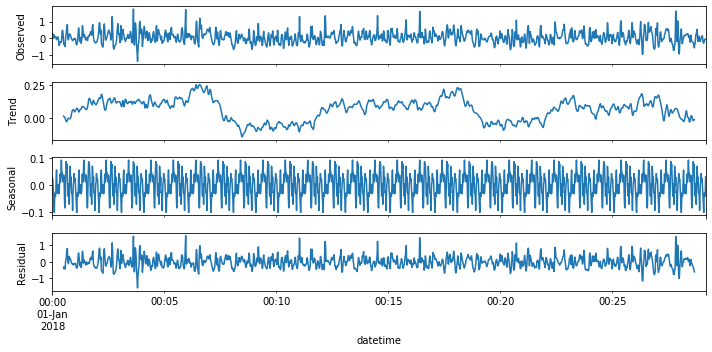

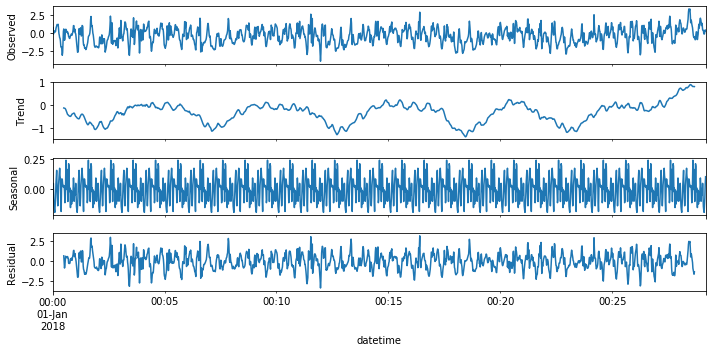

In [31]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
resplot = res.plot()
print(resplot)

# your code here
res2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
resplot2 = res2.plot()
print(resplot2)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [ ]:
# your code here



Create a lag plot for `rotationRate.x`

In [ ]:
# your code here

What are your conclusions from both visualizations?

In [ ]:
# your conclusions here

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [ ]:
# your code here

What are your conclusions from this test?

In [ ]:
# your conclusions here

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [ ]:
# your code here

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# your code here